# Machine Learning Customer Interaction Strategies #

***Here, I employ machine learning algorithms to analyze customer profiles, analyze the factors that impact churn, and suggest customer retention  strategies.***

## Data Preprocessing ##

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
from functools import reduce
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
!pip install eli5
!pip install xgboost
import xgboost as xgb
from sklearn import metrics

from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
import time

import warnings 
warnings.filterwarnings("ignore") 



#jupyter labextension install jupyterlab-plotly
!pip install plotly==5.8.0



! pip install --upgrade seaborn
! pip install --upgrade matplotlib

     |████████████████████████████████| 216 kB 2.5 MB/s eta 0:00:01
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107729 sha256=5e82c37d3a139161ba492f6bdc0dc31e2de01aaef5a5becfc81905827ea041d0
  Stored in directory: /home/jovyan/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
     |████████████████████████████████| 15.2 MB 1.9 MB/s eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.4.0
    Uninstalling plotly-5.4.0:
      Successfully uninstalled plotly-5.4.0
     |████████████████████████████████| 292 kB 2.5 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
     |████████████████████████████████| 11.2 MB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 930 kB 68.0 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing in

In [2]:
df = pd.read_csv('/datasets/gym_churn_us.csv')

**Converting column names to lowercase labels.**

In [3]:
df.columns = map(str.lower, df.columns)

In [4]:
df.shape

(4000, 14)

## Exploratory Data Analysis ##

### Mean values and Standard Deviation ###

In [5]:
df.head()

gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   churn  
0      0  
1      0  
2      0  
3      0  
4      0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

***There are only integers and floats in this dataset, which obviates the need to encode categorical values.*** 

In [7]:
df.describe()

gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       avg_additional_charges_total  month_to_end_contract     lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       avg_class_frequency_total  avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [8]:
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [9]:
df.duplicated().sum()

0

***There are no apparent missing or duplciate values at this stage.***

### Mean feature values of Churn vs Active Clients ###

In [10]:
df.groupby(['churn']).mean()

gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.027882  
1                               1.044546

***On average, about 10% more active users live in the neighborhood than churn user, 87/77%. Churn users tended to have more 1 month contracts than active members. The average age of the active member cohort is higher than the churn cohort, about 30 v. 27, respectively.The average additional charges  was about 160 USD to 115 USD, for churn/active cohorts, respectively. Finally, attendance frequency amongst active users is about twice the churn cohort.***

### Histograms and Feature Distributions of Churn vs Active Clients ###

In [11]:
churn = df.query('churn == 1')
active = df.query('churn == 0')

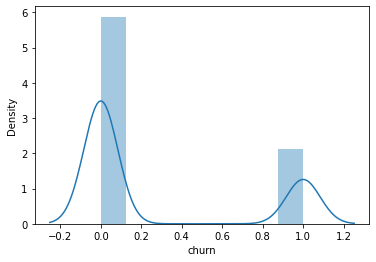

In [12]:

sns.distplot(df['churn'])
plt.show()

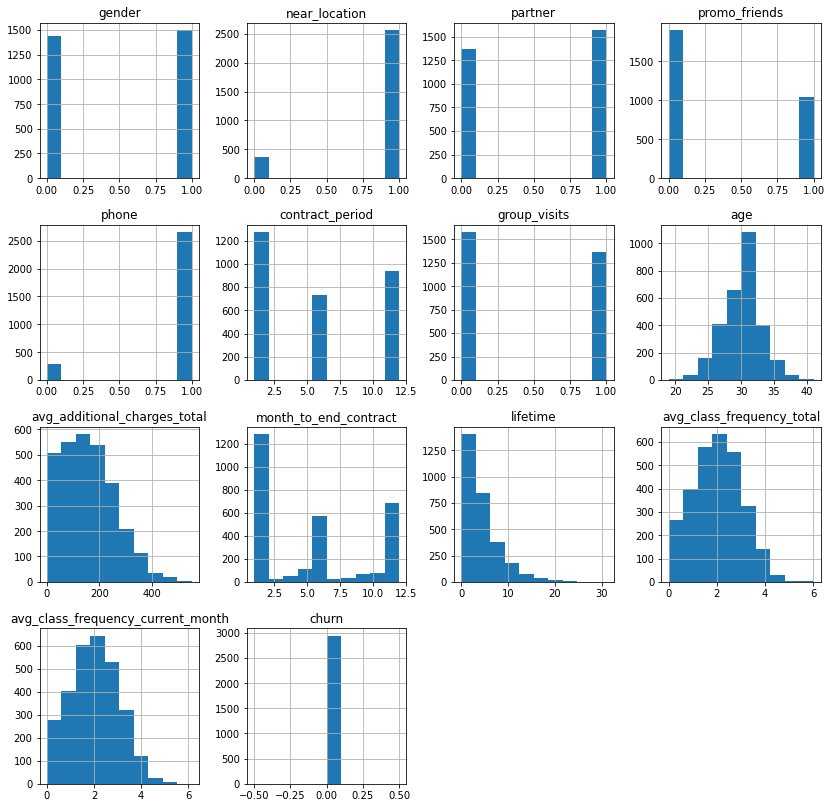

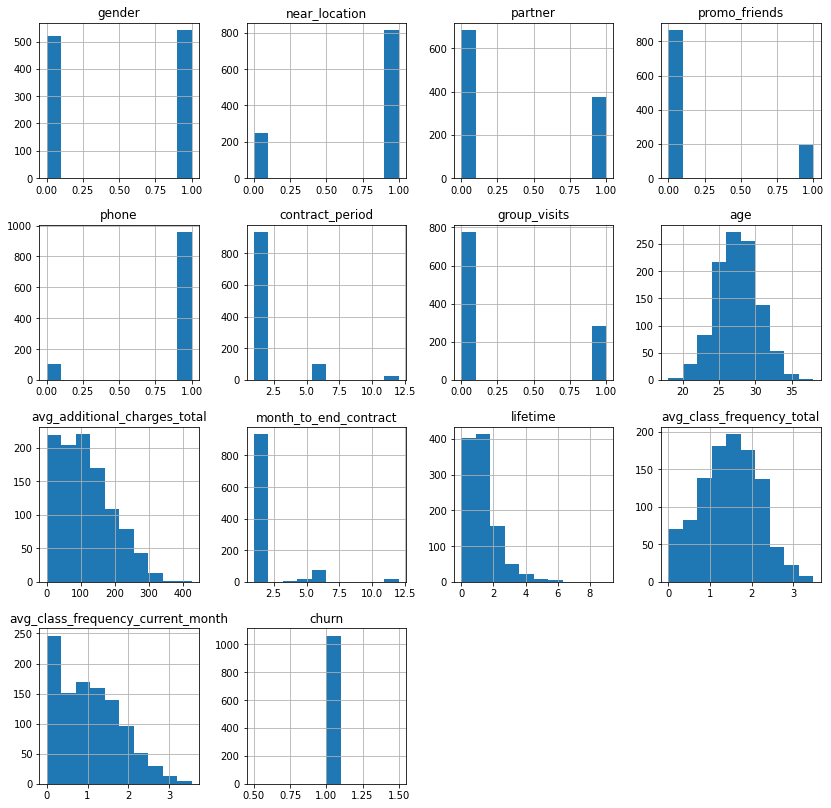

In [13]:

df.groupby(['churn']).hist(figsize=(14,14))# first set of 14 histograms is for 'active' clients, 
                                           # the second set is for 'churn' clients

plt.show()

***More clients joined through the 'bring a friend' offer than left the service. Active members tend to have longer contract durations of 6 or 12 months, while churn members rarely have contracts that last that long. Other parameters are similar between the two groups, with roughly equal numbers of men and women.***

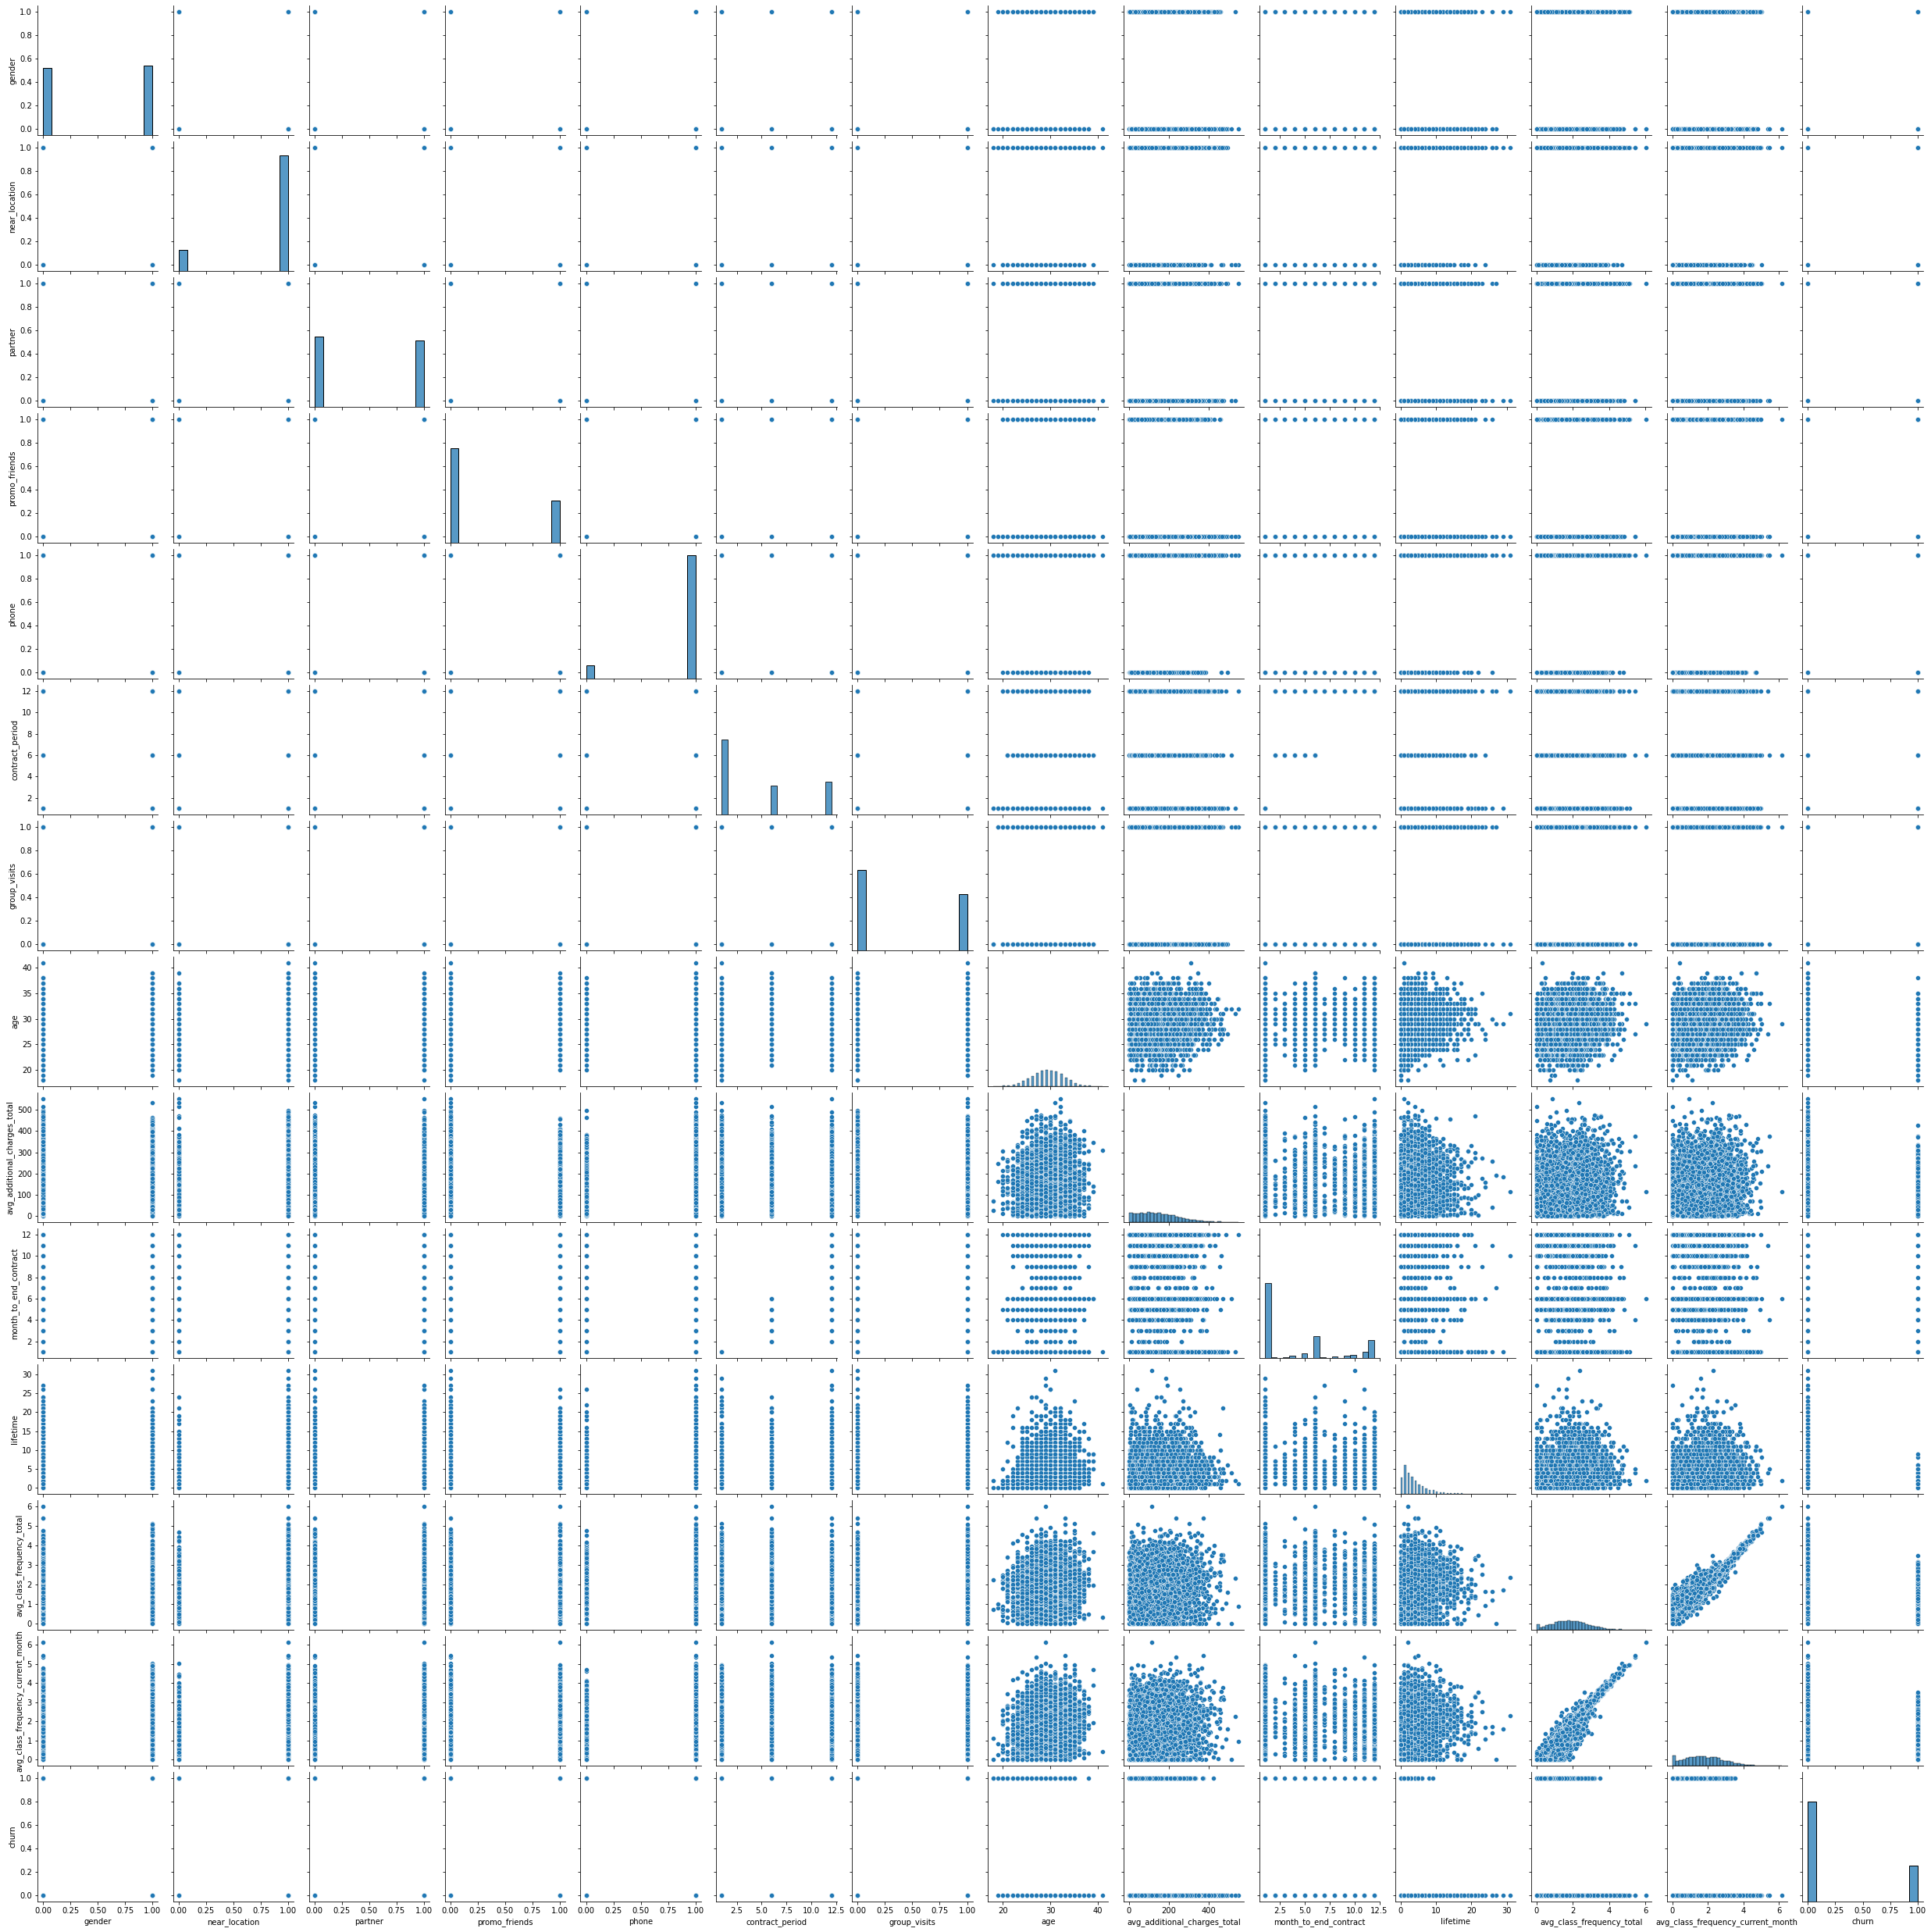

In [14]:
sns.pairplot(df)

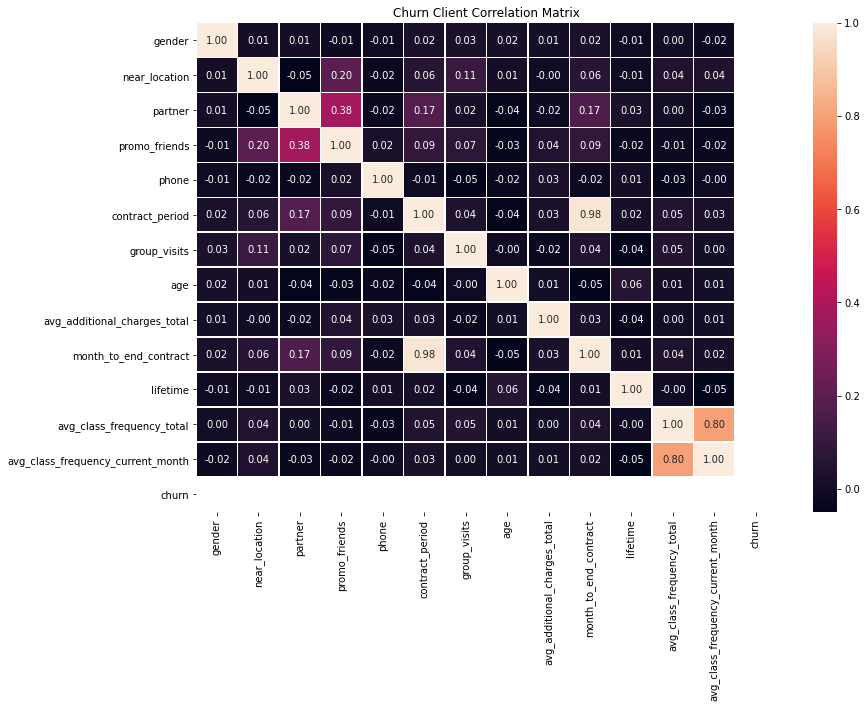

In [16]:
plt.figure(figsize=(13, 9))
sns.heatmap(churn.corr(), annot=True, fmt='.2f',linewidths=.5).set(title = 'Churn Client Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

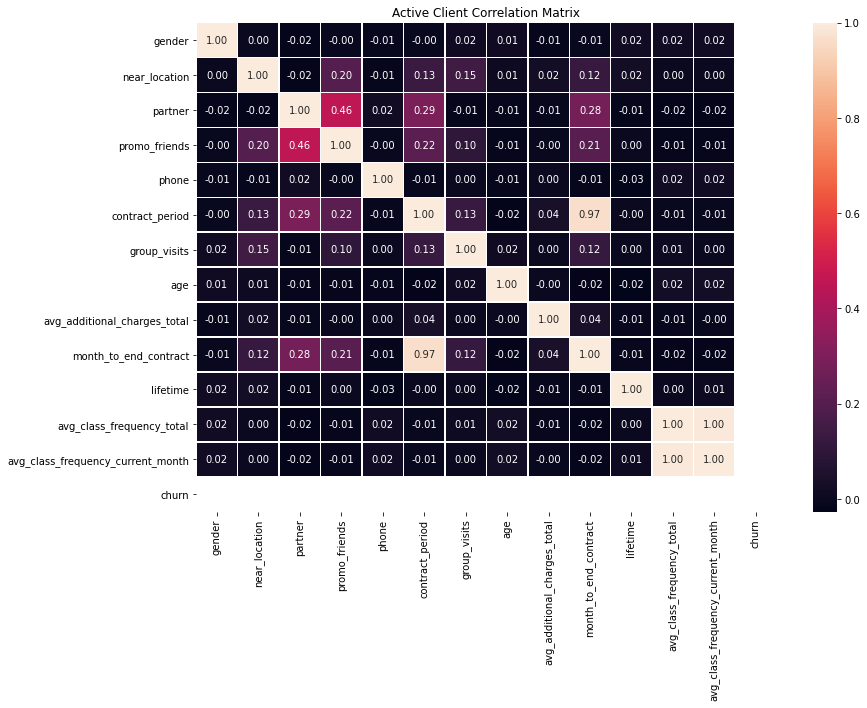

In [17]:
plt.figure(figsize=(13, 9))
sns.heatmap(active.corr(), annot=True, fmt='.2f',linewidths=.5).set(title = 'Active Client Correlation Matrix')
plt.xticks(rotation=90)
plt.show()

***Here, the highest correlation between features, irrespective of churn or active status,  was between 'Month_to_end_contract' and 'Contract_period,' with 97% correlation; and, 'Promo_friends' and 'Partner.' This correlation may result in unreliable statistical inferences because 'Month_to_end_contract' is the derivative feature of 'Contract_period' and likely will not result in a statistically meaningful inference that would forecast a likelihood of churn.   Multicollinearity occurs when we have a group of features that are linearly related. If the correlation coefficient is too high than 0.8, generally, there may be problems with linear regression. However, one approach stresses that multicollinearity is only relevant in linear regression models. On the other hand, the opposing view is one should always be concerned about the collinearity, regardless of the model and irrespective of the method, that is, prediction or classification. Arguably, collinear features in a data set can lead to poor splits when using Random Forest's random feature selection per node, potentially reducing the model's performance. To address this, the impact of the first correlation can be minimized via regression and regularization.***  


***There is a 46% correlation between'Promo_friends' and 'Partner.'The correlation between 'near_location' and 'promo_friends' / 'group_visits' / 'Month_to_end_contract', is 20%, 15%, 12%, respectively. These correlations may indicate that proximity to the gym coupled with the social factors of engaging in exercise in groups, joining the gym through a friend or acquaintance and recommendations via corporate partners likely have a significant impact on new client acquisition and retention.***



## User Churn Predictive Model ##

### Model Delineation ###

In [14]:
X = df.drop('churn', axis = 1)
y = df['churn']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

#### **Logistic regression** ####

In [16]:
LR_model = LogisticRegression(random_state=42) 


In [17]:
LR_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [18]:
y_pred_LR = LR_model.predict(X_test)

In [19]:
y_probas_LR = LR_model.predict_proba(X_test)[:,1] 

In [20]:
y_probas_LR

array([2.70774423e-02, 7.49428344e-02, 6.39081965e-02, 5.01418926e-06,
       2.05909805e-02, 4.23597252e-02, 8.54700922e-02, 4.78822615e-03,
       1.22195108e-02, 3.92735178e-01, 4.06293161e-03, 6.06877149e-04,
       4.70930821e-01, 4.92268048e-04, 1.13548820e-04, 9.94204475e-01,
       9.99339402e-01, 1.16603834e-03, 1.19190511e-02, 6.55865706e-02,
       7.38396908e-03, 8.56080011e-03, 1.57366661e-02, 1.52136373e-03,
       7.21805383e-03, 1.01154572e-01, 9.70595681e-03, 6.40125693e-01,
       5.11121504e-02, 7.66004330e-03, 8.54466537e-01, 1.44810759e-01,
       1.07680170e-05, 3.58189327e-01, 1.12155488e-01, 8.37631406e-06,
       2.21246945e-03, 2.90543984e-06, 5.76225171e-04, 4.95369899e-01,
       9.99415545e-01, 9.08294235e-01, 1.84046599e-05, 1.31784515e-03,
       1.57175051e-02, 9.63411583e-01, 1.27751193e-03, 1.79811759e-02,
       5.55033004e-02, 3.59446545e-01, 8.21172528e-06, 2.93090451e-02,
       9.26251892e-02, 2.36465913e-01, 1.95646574e-04, 1.70599139e-01,
      

In [21]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [22]:
print_all_metrics(y_test, y_pred_LR, y_probas_LR , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.93
	Precision: 0.91
	Recall: 0.80
	F1: 0.85
	ROC_AUC: 0.97


In [23]:
LR_model.score(X_test, y_test)

0.9275

#### **Random Forest** ####

In [24]:

RF_model = RandomForestClassifier(random_state = 42) #n_estimators = 100,

In [25]:
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred_RF = RF_model.predict(X_test)

In [27]:
y_probas_RF = RF_model.predict_proba(X_test)[:,1] 

In [28]:
y_probas_RF

array([0.37, 0.24, 0.02, 0.  , 0.12, 0.11, 0.72, 0.04, 0.08, 0.76, 0.05,
       0.02, 0.89, 0.06, 0.  , 0.85, 1.  , 0.  , 0.01, 0.03, 0.  , 0.01,
       0.  , 0.03, 0.01, 0.22, 0.01, 0.28, 0.06, 0.08, 0.55, 0.72, 0.05,
       0.72, 0.45, 0.05, 0.  , 0.01, 0.02, 0.31, 0.99, 0.6 , 0.01, 0.02,
       0.04, 0.88, 0.01, 0.  , 0.03, 0.49, 0.01, 0.16, 0.25, 0.18, 0.05,
       0.1 , 0.84, 0.  , 0.91, 0.  , 0.  , 0.01, 0.36, 0.06, 0.63, 0.28,
       0.98, 0.06, 0.02, 0.62, 0.32, 0.01, 0.12, 0.55, 0.43, 0.  , 0.01,
       0.95, 0.68, 0.72, 0.86, 0.12, 0.32, 0.05, 0.  , 0.  , 0.93, 0.06,
       0.  , 0.01, 0.02, 0.02, 0.16, 0.55, 0.  , 0.01, 0.98, 0.06, 0.76,
       1.  , 0.  , 0.77, 0.15, 0.03, 0.03, 0.02, 0.24, 0.85, 0.03, 0.92,
       0.43, 0.  , 0.  , 0.82, 0.97, 0.41, 0.  , 0.97, 0.  , 0.04, 0.  ,
       0.86, 0.72, 0.45, 0.01, 0.85, 0.11, 0.13, 0.  , 0.31, 0.  , 0.85,
       0.  , 0.39, 0.9 , 0.67, 0.  , 0.03, 0.08, 0.  , 0.65, 0.74, 0.01,
       0.41, 0.01, 0.74, 0.  , 0.98, 0.03, 0.24, 0.

In [29]:
print_all_metrics(y_test, y_pred_RF, y_probas_RF, title = 'Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.93
	Precision: 0.87
	Recall: 0.85
	F1: 0.86
	ROC_AUC: 0.98


In [30]:
print_all_metrics(y_test, y_pred_LR, y_probas_LR , title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.93
	Precision: 0.91
	Recall: 0.80
	F1: 0.85
	ROC_AUC: 0.97


In [31]:
RF_model.score(X_test, y_test)

0.93

In [32]:
LR_model.score(X_test, y_test)

0.9275

***The Random Forest(RF) algorithm resulted in a superior model in this iteration compared to Logistic Regression(LR); however, during some iterations LR  classification may yield superior results due to the entropic nature the decision tree chooses to split our data.***  

In [34]:
def print_metrics(y_test,y_pred,title):
    print('Metrics for {} model'.format(title))
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test,y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))
    print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)))

Metrics for LogisticRegression model
Accuracy: 0.93
Precision: 0.91
Recall: 0.80
ROC AUC: 0.89


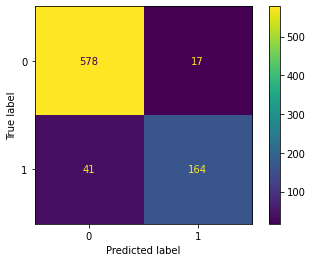

In [69]:
# train the model for Logistic Regression and predict the y values
model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train,y_train)
y_LR = model_LR.predict(X_test)

print_metrics(y_test,y_LR,'LogisticRegression')
plot_confusion_matrix(model_LR, X_test, y_test)  
plt.show()

Metrics for RandomForestClassifier model
Accuracy: 0.93
Precision: 0.87
Recall: 0.85
ROC AUC: 0.90


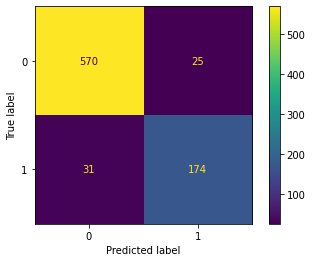

In [68]:
# train the model for Random Forest and predict the y values
model_RFC = RandomForestClassifier(random_state=42,n_estimators=100)
model_RFC.fit(X_train,y_train)
y_RFC = model_RFC.predict(X_test)

print_metrics(y_test,y_RFC,'RandomForestClassifier')
plot_confusion_matrix(model_RFC, X_test, y_test)  
plt.show()

Metrics for GradienBoosting model
Accuracy: 0.94
Precision: 0.91
Recall: 0.87
ROC AUC: 0.92


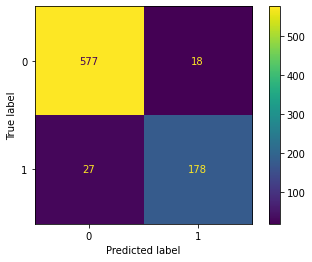

In [67]:

# defining the new model's algorithm based on gradient boosting algorithm
gb_model = GradientBoostingClassifier(random_state=42,n_estimators = 100)
gb_model.fit(X_train, y_train)
y_GB = gb_model.predict(X_test) 

print_metrics(y_test,y_GB,'GradienBoosting')
plot_confusion_matrix(gb_model, X_test, y_test)  
plt.show()

[14:08:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       595


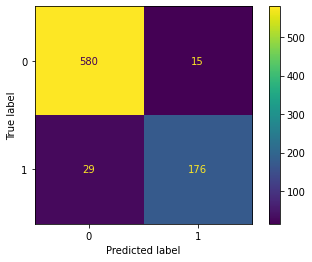

In [63]:
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
print(); 
print(XGB_model)

#Passing X_test to XGB to get predicted target y value
y_XGB = XGB_model.predict(X_test)
#Here we have printed classification report and confusion matrix for the classifier.

print(metrics.classification_report(y_test,y_XGB))
print(metrics.confusion_matrix(y_test,y_XGB))


plot_confusion_matrix(XGB_model, X_test, y_test)  
plt.show()

In [56]:
print_metrics(y_test,y_XGB,'XGBoost')

Metrics for XGBoost model
Accuracy: 0.94
Precision: 0.92
Recall: 0.86
ROC AUC: 0.92


#### Comparing Feature Importance #### 

***Here, the weight of each feature is evaluated during data reshuffling. Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality.(https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html).*** 

In [45]:
feature_names = X_train.columns.tolist()
feature_names

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month']

**Random Forest Feature Importance**

In [46]:
perm = PermutationImportance(RF_model, random_state=42).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = feature_names)

**Logistic Regression Feature Importance**

In [47]:
perm = PermutationImportance(LR_model, random_state=42).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = feature_names)

**XG Boost Feature Importance**

In [64]:
perm = PermutationImportance(XGB_model, random_state=42).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = feature_names)

In [48]:


start_time = time.time()
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.011 seconds


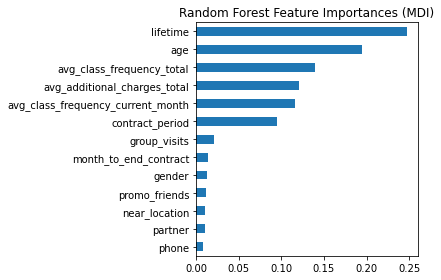

In [49]:
mdi_importances = pd.Series(
    RF_model[-1].feature_importances_, index=feature_names 
).sort_values(ascending=True)

ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

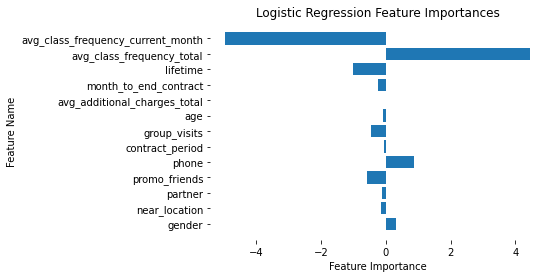

In [50]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns.tolist(),
    'Importance': LR_model.coef_[0]
})

LR_importances = importances.sort_values(by='Attribute', ascending=True)


plt.barh(importances.Attribute,importances.Importance)
plt.title('Logistic Regression Feature Importances')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance')


sns.despine(left=True, bottom=True)
plt.show()

***The most important features in predicting churn are how long a client has been a member ('Lifetime'),  a client's class frequency ('avg_class_frequency_total', 'avg_class_frequency_current_month'), and a client's age. According to the Logistic Regression Permutation Importance, "contract period" is ranked 4th after 'avg_class_frequency_current_month', 'avg_class_frequency_total', 'lifetime', features which are, de facto, derivatives of contract period; which tends to show that "contract period" is dispositive in assessing the likelihood of churn.***

In [51]:
result_RF = permutation_importance(RF_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result_RF.importances_mean, index=feature_names)

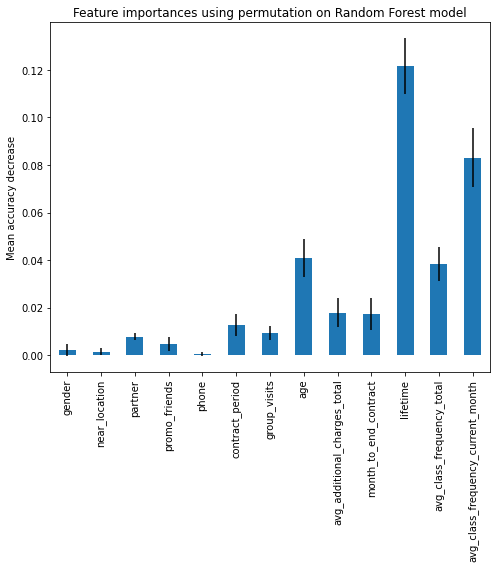

In [52]:
fig, ax = plt.subplots(figsize=(7,8))
forest_importances.plot.bar(yerr=result_RF.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on Random Forest model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [53]:
result_LR = permutation_importance(LR_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
LR_importances = pd.Series(result_LR.importances_mean, index=feature_names)

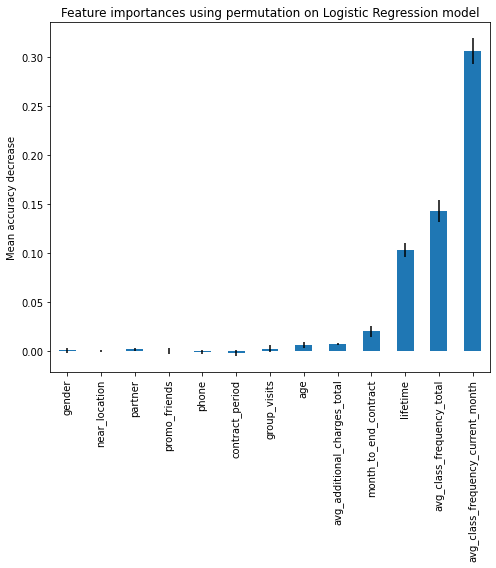

In [54]:
fig, ax = plt.subplots(figsize=(7,8))
LR_importances.plot.bar(yerr=result_LR.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on Logistic Regression model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

***The same features are detected as most important using both methods, although the relative importance slightly varies. Theoretically, MDI is less likely than Permutation Importance to fully omit a feature; however, here, there are ommissions.(https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) On the other hand, Permutation Importance is not biased towards high cardinality features.(https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html).***

### Hyperparameter Optimization for Classification ###

#### RandomizedSearchCV ####

In [55]:
#Hyperparameter optimization for Logistc Regression Model

## Hyperparameter grid RandomizedSearchCV & GridsearchCV will search 
grid_LR = {'C': [1.0],
 'class_weight': [None],
 'dual': [False, True],
 'fit_intercept': [True, False],
 'intercept_scaling': [1],
 'l1_ratio': [None],
 'max_iter': [10, 20, 50, 100],
 'multi_class': ['auto'],
 'n_jobs': [None, 1],
 'penalty': ['l2', 'l1'],
 'random_state': [None, 42],
 'solver': ['lbfgs', 'saga'],
 'tol': [0.0001],
 'verbose': [0],
 'warm_start': [False, True]}
#
LR_clf = LogisticRegression()
#Setup RandomizedSearchCV
rs_clf_LR = RandomizedSearchCV(estimator = LR_clf,
                            param_distributions = grid_LR,
                            n_iter=20, # try 20 models total -- think for loop
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

## Fit the RandomizedSearchCV version of clf
RCV_clf_LR = rs_clf_LR.fit(X_train, y_train);


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=False, intercept_scaling=1, l1_ratio=None, max_iter=50, multi_class=auto, n_jobs=None, penalty=l2, random_state=None, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; total time=   0.0s
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=False, intercept_scaling=1, l1_ratio=None, max_iter=50, multi_class=auto, n_jobs=None, penalty=l2, random_state=None, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; total time=   0.0s
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=False, intercept_scaling=1, l1_ratio=None, max_iter=50, multi_class=auto, n_jobs=None, penalty=l2, random_state=None, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; total time=   0.0s
[CV] END C=1.0, class_weight=None, dual=True, fit_intercept=False, intercept_scaling=1, l1_ratio=None, max_iter=50, multi_class=auto, n_jobs=None, penalty=l2, random_state=None, solv

In [92]:
print(f"The best Logistic Regression parameters are {RCV_clf_LR.best_params_} according to  RandomizedSearchCV.")

The best Logistic Regression parameters are {'warm_start': True, 'verbose': 0, 'tol': 0.0001, 'solver': 'lbfgs', 'random_state': 42, 'penalty': 'l2', 'n_jobs': 1, 'multi_class': 'auto', 'max_iter': 50, 'l1_ratio': None, 'intercept_scaling': 1, 'fit_intercept': True, 'dual': False, 'class_weight': None, 'C': 1.0} according to  RandomizedSearchCV.


In [57]:
#Hyperparameter optimization for Random Forest Model

# Hyperparameter grid RandomizedSearchCV will search over
grid_RF = {"n_estimators": [10, 100, 200, 500, 1000, 1200, 2400],
        "max_depth": [None, 5, 10, 20],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# RandomForestClassifier's n_jobs is default to 100
RF_clf = RandomForestClassifier(n_jobs=1)
# Setup RandomizedSearchCV
rs_clf_RF = RandomizedSearchCV(estimator = RF_clf,
                            param_distributions = grid_RF,
                            n_iter=20, 
                            cv=5,
                            verbose=2) 

# Fit the RandomizedSearchCV version of clf
RCV_clf_RF = rs_clf_RF.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=20

In [58]:
print(f"The best Logistic Regression parameters are {RCV_clf_RF.best_params_} according to  RandomizedSearchCV.")

The best Logistic Regression parameters are {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None} according to  RandomizedSearchCV.


In [94]:

#Hyperparameter optimization for XGBoost Model

## Hyperparameter grid RandomizedSearchCV & GridsearchCV will search 
grid_XG = {"booster":['gbtree'], "colsample_bylevel":[1], "learning_rate":[0.300000012],
               "max_depth":[6], "min_child_weight":[1],"n_jobs":[8]}
# n_estimators=100, n_jobs=8



#Setup RandomizedSearchCV
rs_clf_XGB = RandomizedSearchCV(estimator = XGB_model,
                            param_distributions = grid_XG,
                            n_iter=20, # try 20 models total -- think for loop
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

## Fit the RandomizedSearchCV version of clf
RCV_clf_XGB = rs_clf_XGB.fit(X_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[15:29:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END booster=gbtree, colsample_bylevel=1, learning_rate=0.300000012, max_depth=6, min_child_weight=1, n_jobs=8; total time= 1.3min
[15:30:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END booster=gbtree, colsample_bylevel=1, learning_rate=0.300000012, max_depth=6, min_child_weight=1, n_jobs=8; total time= 1.3min
[15:32:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error'

In [95]:
print(f"The best XG Boost parameters are {RCV_clf_XGB.best_params_} according to  RandomizedSearchCV.")

The best XG Boost parameters are {'n_jobs': 8, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.300000012, 'colsample_bylevel': 1, 'booster': 'gbtree'} according to  RandomizedSearchCV.


#### GridSearchCV ####

In [61]:
GS_lr = GridSearchCV(LR_clf, grid_LR, cv=5, verbose=2)
Grid_Search_lr = GS_lr.fit(X_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
[CV] END C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=10, multi_class=auto, n_jobs=None, penalty=l2, random_state=None, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; total time=   0.1s
[CV] END C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=10, multi_class=auto, n_jobs=None, penalty=l2, random_state=None, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; total time=   0.6s
[CV] END C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=10, multi_class=auto, n_jobs=None, penalty=l2, random_state=None, solver=lbfgs, tol=0.0001, verbose=0, warm_start=False; total time=   0.3s
[CV] END C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=10, multi_class=auto, n_jobs=None, penalty=l2, random_state=None, so

In [96]:
print(f"The best Logistic Regression parameters are {Grid_Search_lr.best_params_} according to GridSearchCV.")

The best Logistic Regression parameters are {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} according to GridSearchCV.


In [97]:
GS_RF = GridSearchCV(RF_clf, grid_RF, cv=5, verbose=2)
Grid_Search_RF = GS_RF.fit(X_train,y_train)

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

In [ ]:
print(f"The best Random Forest parameters are {Grid_Search_RF.best_params_} according to GridSearchCV.")

The best Random Forest parameters are {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000} according to GridSearchCV.


In [ ]:
GS_xg = GridSearchCV(XGB_model, grid_XG, cv=5, verbose=2)
Grid_Search_xg = GS_xg.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[17:07:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END booster=gbtree, colsample_bylevel=1, learning_rate=0.300000012, max_depth=6, min_child_weight=1, n_jobs=8; total time= 1.3min
[17:08:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END booster=gbtree, colsample_bylevel=1, learning_rate=0.300000012, max_depth=6, min_child_weight=1, n_jobs=8; total time= 1.3min
[17:09:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error'

In [ ]:
print(f"The best XG Boost parameters are {Grid_Search_xg.best_params_} according to GridSearchCV.")

The best XG Boost parameters are {'booster': 'gbtree', 'colsample_bylevel': 1, 'learning_rate': 0.300000012, 'max_depth': 6, 'min_child_weight': 1, 'n_jobs': 8} according to GridSearchCV.


#### Comparing Model Predictions ####

In [101]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [102]:
baseline_metrics = evaluate_preds(y_test, y_pred_RF)
baseline_metrics

Acc: 93.00%
Precision: 0.87
Recall: 0.85
F1 score: 0.86


{'accuracy': 0.93, 'precision': 0.87, 'recall': 0.85, 'f1': 0.86}

In [104]:
gs_y_preds_lr = Grid_Search_lr.predict(X_test)
# Evaluate the predictions
gs_metrics_lr = evaluate_preds(y_test, gs_y_preds_lr)

Acc: 92.75%
Precision: 0.91
Recall: 0.80
F1 score: 0.85


In [105]:
gs_y_preds_rf = Grid_Search_RF.predict(X_test)
# Evaluate the predictions
gs_metrics_rf = evaluate_preds(y_test, gs_y_preds_rf)

Acc: 93.25%
Precision: 0.89
Recall: 0.84
F1 score: 0.87


In [106]:
gs_y_preds_xg = Grid_Search_xg.predict(X_test)
# Evaluate the predictions
gs_metrics_xg = evaluate_preds(y_test, gs_y_preds_xg)

Acc: 94.50%
Precision: 0.92
Recall: 0.86
F1 score: 0.89


In [107]:
rs_y_preds_lr = RCV_clf_LR.predict(X_test)
# Evaluate the predictions
rs_metrics_lr = evaluate_preds(y_test, rs_y_preds_lr)

Acc: 92.75%
Precision: 0.91
Recall: 0.80
F1 score: 0.85


In [108]:
rs_y_preds_rf = RCV_clf_RF.predict(X_test)
# Evaluate the predictions
rs_metrics_rf = evaluate_preds(y_test, rs_y_preds_rf)

Acc: 93.25%
Precision: 0.89
Recall: 0.84
F1 score: 0.87


In [109]:
rs_y_preds_xg = RCV_clf_XGB.predict(X_test)
# Evaluate the predictions
rs_metrics_xg = evaluate_preds(y_test, rs_y_preds_xg)

Acc: 94.50%
Precision: 0.92
Recall: 0.86
F1 score: 0.89


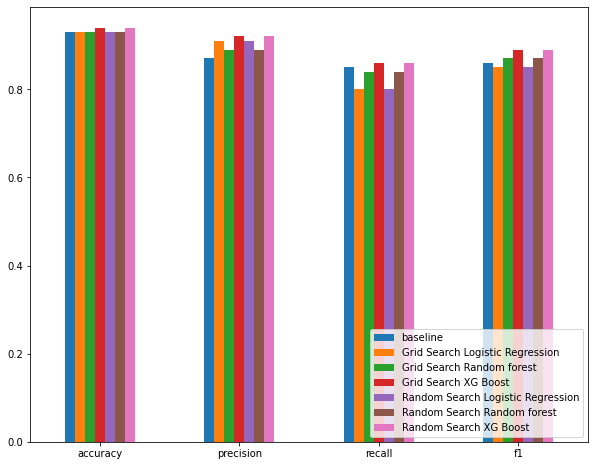

In [120]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "Grid Search Logistic Regression": gs_metrics_lr,
                                "Grid Search Random forest": gs_metrics_rf,
                                 "Grid Search XG Boost":gs_metrics_xg,
                               "Random Search Logistic Regression": gs_metrics_lr,
                                "Random Search Random forest": gs_metrics_rf,
                                 "Random Search XG Boost":gs_metrics_xg})

compare_metrics.plot.bar(figsize=(10, 8))
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

***XG Boost is the best performing model with the optimized cross validated hyperparameters from 'Random Search' and 'Grid Search'.***

### User Clustering ###

In [73]:
# define the function for rendering graphs of paired features for the clusters
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
          hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

#### Standardize the data. ####

In [74]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

#### Gradient Boosting ####

In [75]:
# defining the new model's algorithm based on gradient boosting algorithm
gb_model = GradientBoostingRegressor(n_estimators = 100)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(x_sc) 
y_pred

array([0.88483698, 0.7261072 , 1.01836151, ..., 0.71728052, 1.00166065,
       0.80319506])

#### Using the linkage() function to build a matrix of distances based on the standardized feature matrix and plotting a dendrogram. ####

In [76]:
linked = linkage(x_sc, method = 'ward')

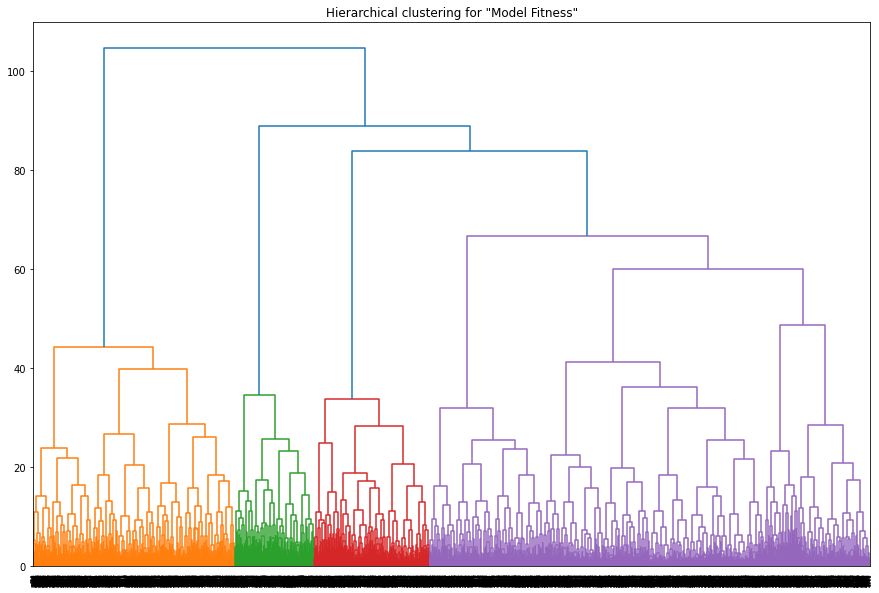

In [77]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for "Model Fitness"')
plt.show() 

***Here, one must be cognizant that the dendrogram is a summary of the distance matrix, and,like most summaries, information is lost. For example, the dendrogram suggests that the purple cluster and red cluster are much closer to each other than the purple cluster to the green cluster, but the original data, shows us that this is not true. A dendrogram is only accurate when data satisfies the ultrametric tree inequality, that is, the distance between any two points  is equal to the length of the unique path connecting them, and this is unlikely for any real-world data.***

***The consequence of the information loss is that the dendrograms are most accurate at the bottom, showing which items are very similar.***

#### Training the clustering model with the K-means algorithm and predicting customer clusters. ####

In [81]:
km = KMeans(n_clusters = 4, random_state=42)
# predict the clusters for observations (the algorithm assigns them a number from 0 to 2)
labels = km.fit_predict(x_sc)

# store cluster labels in the field of our dataset
df['cluster_churn'] = pd.Series(labels, index=df.index)

In [82]:
from sklearn.metrics import silhouette_score

silhouette_score(x_sc, labels) 

0.13444106235115572

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 50 The average silhouette_score is : 0.36298414425830716


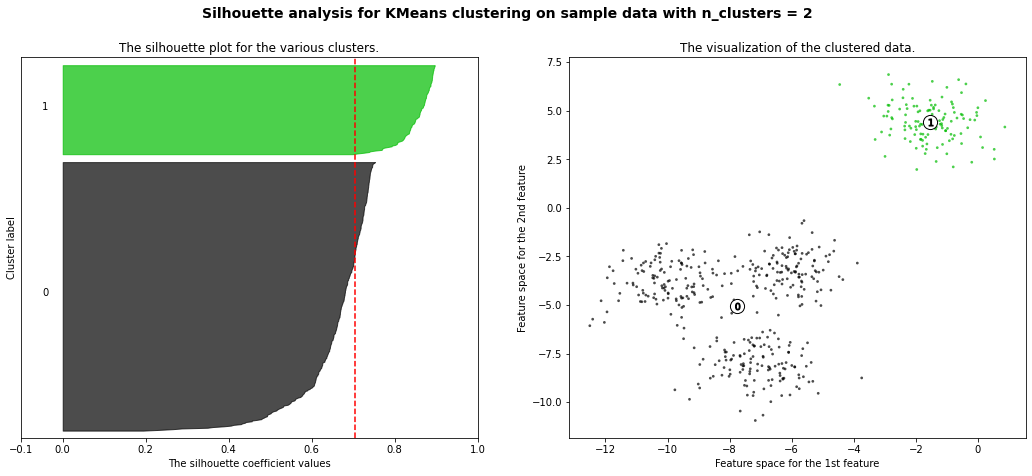

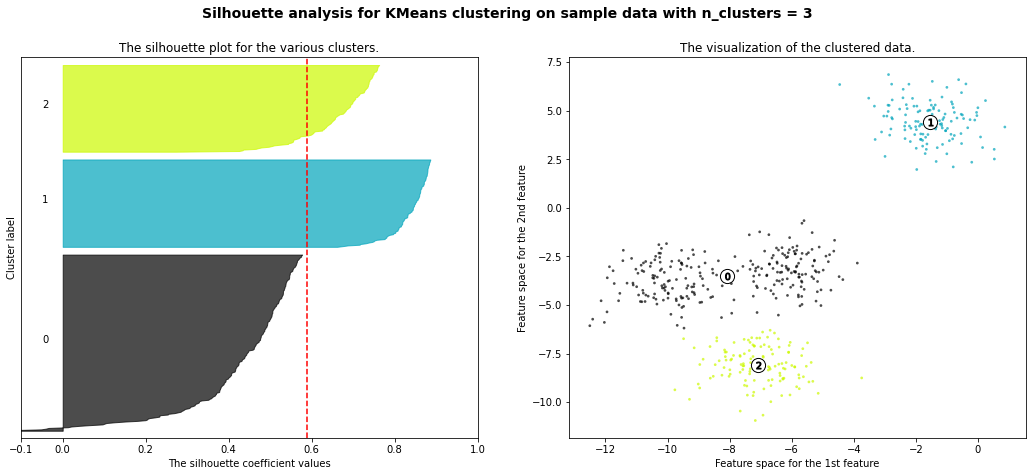

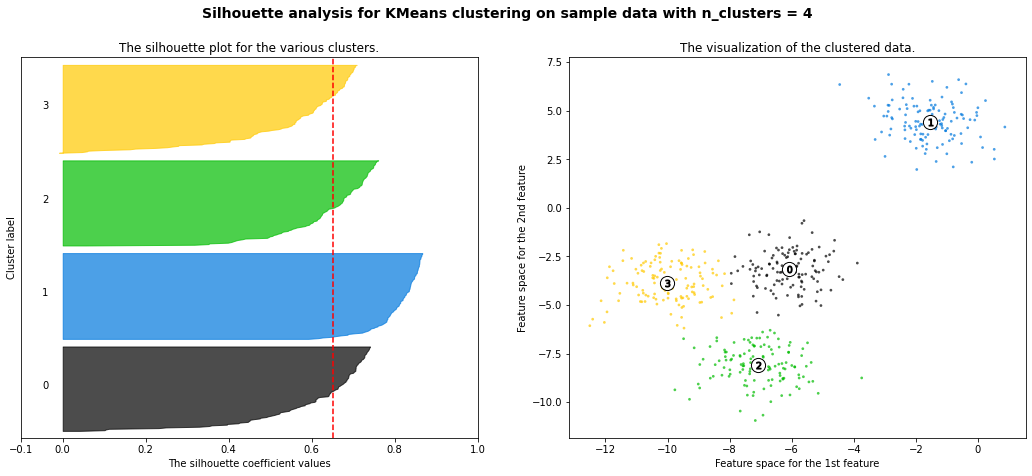

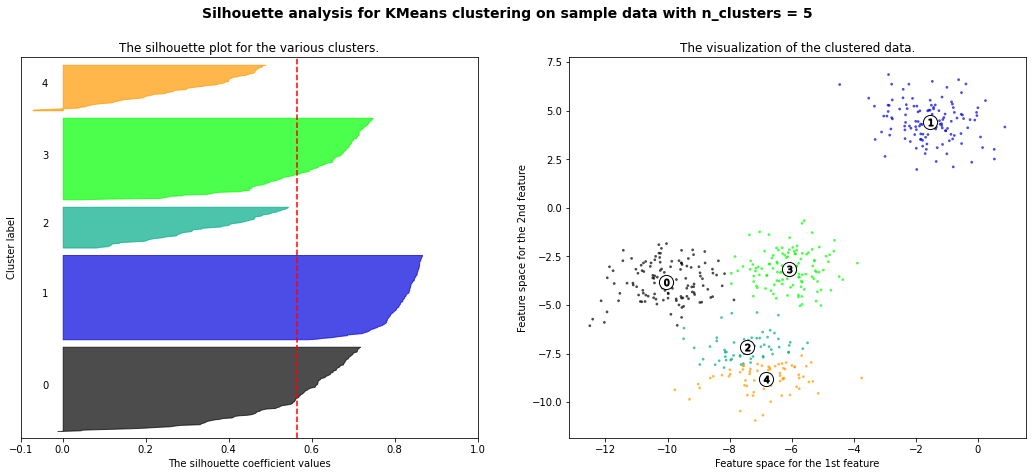

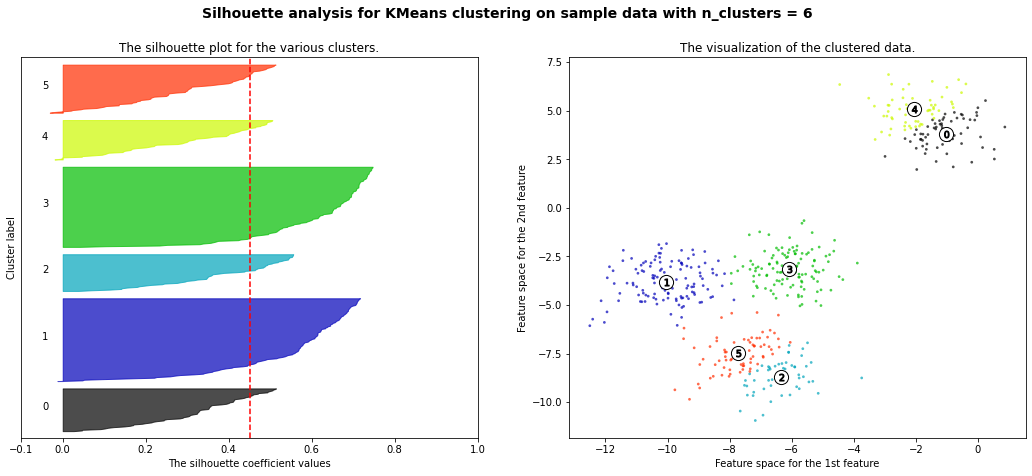

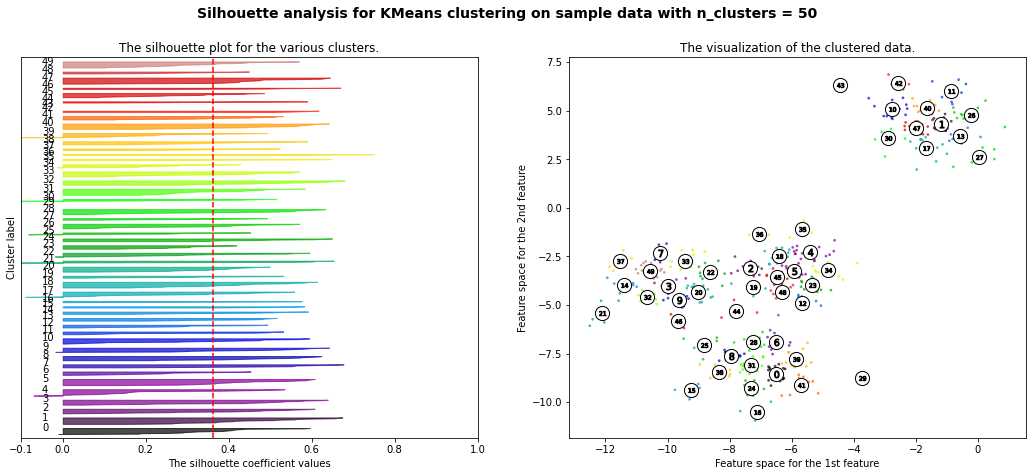

In [83]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 50]# Setting the number of clusters

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

***Here,  4 clusters for "KMeans" is likely an optimal setting because the resulting average silhouette score is 0.65 , and is above 0.4, a common threshold that indicates adequate clustering and acceptable cluster heterogeneity. The input data is the normalized or standardized feature matrix and a list of labels predicted by the clustering algorithm.The silhouette score takes values from -1 to 1. The closer to 1, the better the clustering. Here, 'KMeans' produces an average score of 0.65 with 4, approximately, distinct clusters that sufficiently account for overlapping values, and likely produces  optimal aggregation, subject to the volatility in the  data's distribution, when analyzing the distinct idiosyncrasies of the clusters.***

**Churn Ratios by Cluster**

In [84]:
churn_ratio = df.query('churn == 1').groupby('cluster_churn').count() / (df.query('churn == 1').groupby('cluster_churn').count() + df.query('churn == 0').groupby('cluster_churn').count())

churn_ratio['churn']

cluster_churn
0    0.029685
1    0.559676
2    0.266839
3    0.091168
Name: churn, dtype: float64

In [169]:
# get the statistics of the mean feature values per cluster
clusters_grouped = df.groupby('cluster_churn').mean()
clusters_grouped

gender  near_location   partner  promo_friends  phone  \
cluster_churn                                                            
0              0.503711       0.940631  0.777365       0.572356    1.0   
1              0.487525       0.759946  0.380310       0.190155    1.0   
2              0.523316       0.862694  0.471503       0.305699    0.0   
3              0.544160       0.861349  0.344729       0.206078    1.0   

               contract_period  group_visits        age  \
cluster_churn                                             
0                    10.697588      0.536178  29.912801   
1                     1.900202      0.292650  28.041807   
2                     4.777202      0.427461  29.297927   
3                     2.403609      0.448243  30.005698   

               avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_churn                                                                  
0                                161.363032               9.768089  4.730056   
1                                129.643147               1.805125  2.236008   
2                                144.208179               4.466321  3.940415   
3                                157.550256               2.241216  4.713200   

               avg_class_frequency_total  avg_class_frequency_current_month  \
cluster_churn                                                                 
0                               1.983884                           1.975592   
1                               1.207640                           0.954212   
2                               1.854211                           1.723967   
3                               2.726303                           2.714123   

                  churn  
cluster_churn            
0              0.029685  
1              0.559676  
2              0.266839  
3              0.091168

***The 56% churn rate for Cluster 2, whose feature "avg_class_frequency_current_month," the average frequency of visits per week over the preceding month, was prioritized by the 'feature importance" function, tends to show  that there is an inverse correlation between average class attendance and the likelihood of churn, the target value. The  function correlates with the highest churn group, which is Cluster 2 ("cluster_churn 1"). That is, Cluster 2 with a churn of about 56% is the highest churn group, and in accordance with the feature importance of 'avg_class_frequency_total,' here, about 1.21, is the lowest rate among the clusters. Accordingly, the cluster with the two lowest churn rates is Cluster 1 (cluster_churn 0) 3% and Cluster 3 (cluster_churn 4) 9%, whose "avg_class_frequency_total" is about 2 and 2.70, respectively. Although these two clusters don't strictly and proportionately evidence the correlation of the lower higher the attendance rate the lower the churn because  Cluster 3 has a 7% higher churn rate but a higher attendance frequency, nevertheless a reasonable inference is  the relatively high number of 12-month contract in Cluster 1 compared to Cluster 4, which accounts for a less strict adherence to attendance because of the longer time frame and the remaining amount of time allowed for exercise; that is there's less urgency to maximize the use of one's membership. Finally, the last parallel between cluster 1 and Cluster 4, which evidences an apparent correlation is the the  "avg_additional_charges_total" are the two highest amounts, and a larger amount of money expended may be a good indicator of less churn.***


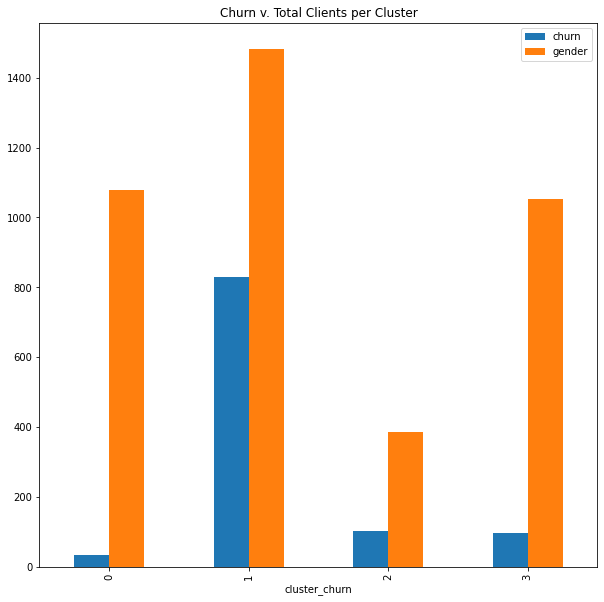

In [170]:
df.groupby('cluster_churn').agg({'churn':sum, 'gender':'count'}).plot(kind='bar',figsize=(10,10))
plt.title('Churn v. Total Clients per Cluster')
plt.show()



In [171]:
df.groupby('cluster_churn').agg({'churn':sum, 'gender':'count'})

churn  gender
cluster_churn               
0                 32    1078
1                830    1483
2                103     386
3                 96    1053

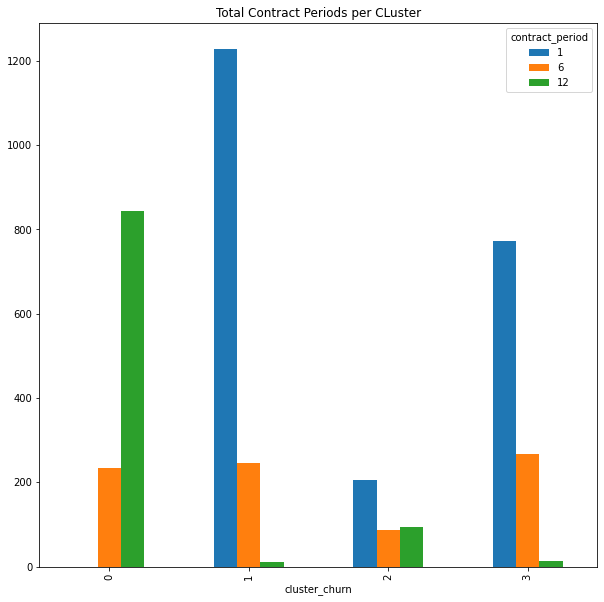

In [172]:
#The number of members per contract period and cluster
df.groupby('cluster_churn').agg('contract_period').value_counts().unstack().plot(kind='bar', figsize=(10,10))
plt.title('Total Contract Periods per CLuster')
plt.show()
 

In [173]:
pd.option_context('display.max_columns', 500)#precluding truncation of dataframe

In [174]:
pd.options.display.max_columns = 800
full_group = df.groupby(['cluster_churn', 'churn']).describe().reset_index()


full_group# statistics bifurcated by cluster and churn


cluster_churn churn  gender                                               \
                        count      mean       std  min  25%  50%  75%  max   
0             0     0  1046.0  0.500956  0.500238  0.0  0.0  1.0  1.0  1.0   
1             0     1    32.0  0.593750  0.498991  0.0  0.0  1.0  1.0  1.0   
2             1     0   653.0  0.471669  0.499579  0.0  0.0  0.0  1.0  1.0   
3             1     1   830.0  0.500000  0.500301  0.0  0.0  0.5  1.0  1.0   
4             2     0   283.0  0.522968  0.500357  0.0  0.0  1.0  1.0  1.0   
5             2     1   103.0  0.524272  0.501853  0.0  0.0  1.0  1.0  1.0   
6             3     0   957.0  0.542320  0.498466  0.0  0.0  1.0  1.0  1.0   
7             3     1    96.0  0.562500  0.498682  0.0  0.0  1.0  1.0  1.0   

  near_location                                              partner  \
          count      mean       std  min  25%  50%  75%  max   count   
0        1046.0  0.940727  0.236249  0.0  1.0  1.0  1.0  1.0  1046.0   
1          32.0  0.937500  0.245935  0.0  1.0  1.0  1.0  1.0    32.0   
2         653.0  0.777948  0.415945  0.0  1.0  1.0  1.0  1.0   653.0   
3         830.0  0.745783  0.435683  0.0  0.0  1.0  1.0  1.0   830.0   
4         283.0  0.886926  0.317244  0.0  1.0  1.0  1.0  1.0   283.0   
5         103.0  0.796117  0.404853  0.0  1.0  1.0  1.0  1.0   103.0   
6         957.0  0.859979  0.347190  0.0  1.0  1.0  1.0  1.0   957.0   
7          96.0  0.875000  0.332455  0.0  1.0  1.0  1.0  1.0    96.0   

                                               promo_friends            \
       mean       std  min  25%  50%  75%  max         count      mean   
0  0.775335  0.417561  0.0  1.0  1.0  1.0  1.0        1046.0  0.571702   
1  0.843750  0.368902  0.0  1.0  1.0  1.0  1.0          32.0  0.593750   
2  0.427259  0.495060  0.0  0.0  0.0  1.0  1.0         653.0  0.208270   
3  0.343373  0.475121  0.0  0.0  0.0  1.0  1.0         830.0  0.175904   
4  0.501767  0.500883  0.0  0.0  1.0  1.0  1.0         283.0  0.360424   
5  0.388350  0.489758  0.0  0.0  0.0  1.0  1.0         103.0  0.155340   
6  0.353187  0.478210  0.0  0.0  0.0  1.0  1.0         957.0  0.212121   
7  0.260417  0.441166  0.0  0.0  0.0  1.0  1.0          96.0  0.145833   

                                       phone                                \
        std  min  25%  50%  75%  max   count mean  std  min  25%  50%  75%   
0  0.495069  0.0  0.0  1.0  1.0  1.0  1046.0  1.0  0.0  1.0  1.0  1.0  1.0   
1  0.498991  0.0  0.0  1.0  1.0  1.0    32.0  1.0  0.0  1.0  1.0  1.0  1.0   
2  0.406382  0.0  0.0  0.0  0.0  1.0   653.0  1.0  0.0  1.0  1.0  1.0  1.0   
3  0.380968  0.0  0.0  0.0  0.0  1.0   830.0  1.0  0.0  1.0  1.0  1.0  1.0   
4  0.480974  0.0  0.0  0.0  1.0  1.0   283.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.364000  0.0  0.0  0.0  0.0  1.0   103.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.409024  0.0  0.0  0.0  0.0  1.0   957.0  1.0  0.0  1.0  1.0  1.0  1.0   
7  0.354792  0.0  0.0  0.0  0.0  1.0    96.0  1.0  0.0  1.0  1.0  1.0  1.0   

       contract_period                                                    \
   max           count       mean       std  min   25%   50%   75%   max   
0  1.0          1046.0  10.732314  2.450476  6.0  12.0  12.0  12.0  12.0   
1  1.0            32.0   9.562500  2.993946  6.0   6.0  12.0  12.0  12.0   
2  1.0           653.0   2.474732  2.452879  1.0   1.0   1.0   6.0  12.0   
3  1.0           830.0   1.448193  1.483838  1.0   1.0   1.0   1.0  12.0   
4  0.0           283.0   5.862191  4.687249  1.0   1.0   6.0  12.0  12.0   
5  0.0           103.0   1.796117  2.161877  1.0   1.0   1.0   1.0  12.0   
6  1.0           957.0   2.497388  2.479465  1.0   1.0   1.0   6.0  12.0   
7  1.0            96.0   1.468750  1.465053  1.0   1.0   1.0   1.0   6.0   

  group_visits                                                  age  \
         count      mean       std  min  25%  50%  75%  max   count   
0       1046.0  0.542065  0.498466  0.0  0.0  1.0  1.0  1.0  1046.0   
1   

1     2207
12     960
6      833
Name: contract_period, dtype: int64

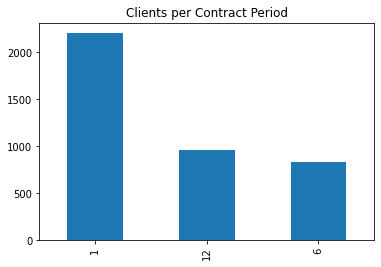

In [175]:
df.contract_period.value_counts().plot(kind='bar')
plt.title('Clients per Contract Period')
df.contract_period.value_counts()

contract_period
1     934
6     104
12     23
Name: churn, dtype: int64

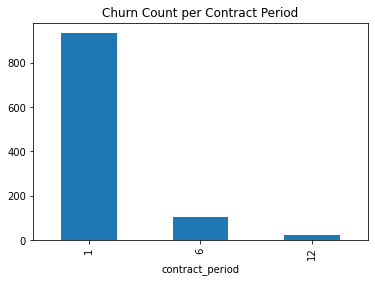

In [176]:
df.groupby(['contract_period'])['churn'].sum().plot(kind='bar')
plt.title('Churn Count per Contract Period')
df.groupby(['contract_period'])['churn'].sum()

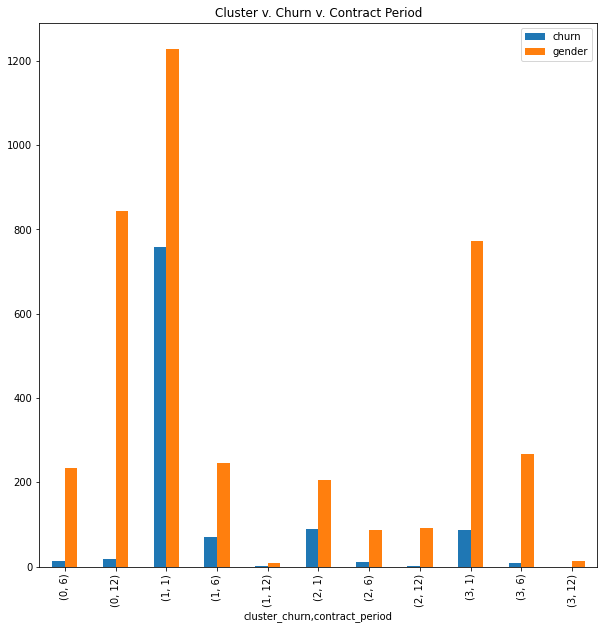

In [177]:
#counting number of clients via gender 
group = df.groupby(['cluster_churn', 'contract_period']).agg({'churn':sum, 'gender':'count'}).plot(kind='bar',figsize=(10,10))
plt.title('Cluster v. Churn v. Contract Period')
plt.show()


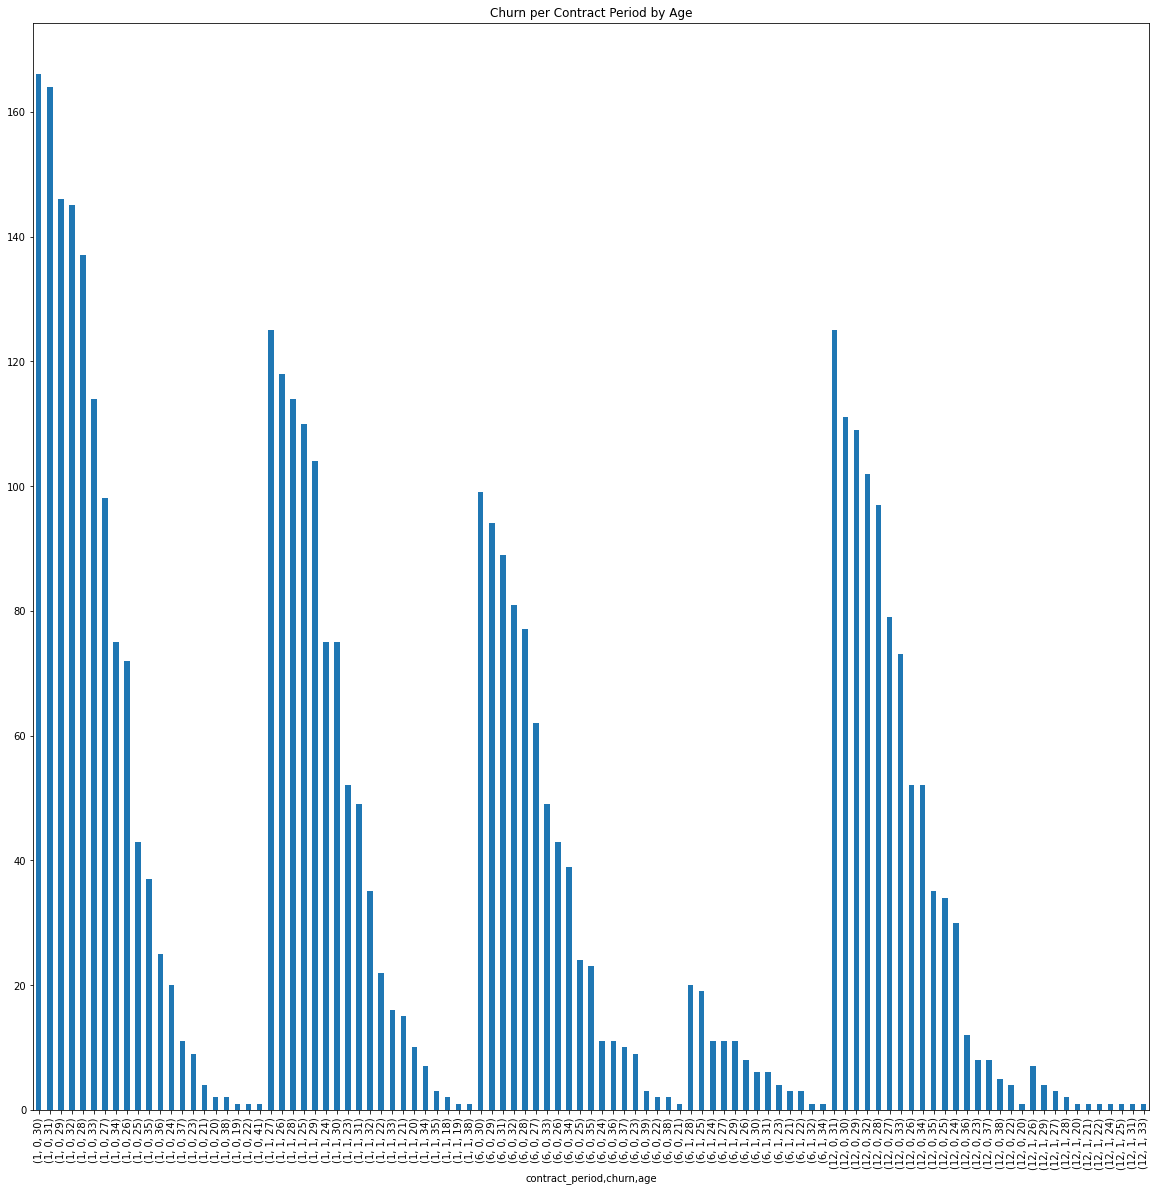

In [178]:
df.groupby(['contract_period', 'churn'])['age'].value_counts().plot(kind='bar', figsize=(20,20))
plt.title('Churn per Contract Period by Age')
plt.show()

***Overall, the highest churn occurred in the 1-month membership cohort, virtually across every age group, maybe because clients mostly sign up for 1-month by a large margin, which costs less; the concomitant lower commitment; and, possibly a relatively precarious financial situation. Conversely, the lowest churn the 12-month membership cohort, virtually across every age group, and could be attributed to higher commitment and more stable financial situation.***

In [179]:
cluster_age_count = df.groupby(['cluster_churn', 'age'])['gender'].sum().reset_index()

cluster_age_count.rename(columns={"gender":'members'}, inplace=True)

In [181]:
df.age.median()

29.0

In [182]:
df.age.value_counts()

29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
18      2
19      2
41      1
Name: age, dtype: int64

In [183]:
df.cluster_churn.value_counts()

1    1483
0    1078
3    1053
2     386
Name: cluster_churn, dtype: int64

In [184]:
churn_ratio['churn']

cluster_churn
0    0.029685
1    0.559676
2    0.266839
3    0.091168
Name: churn, dtype: float64


***Here, Cluster 1 (cluster_churn 0), with 1483 clients,  has the lowest  churn rate of 32 clients, which is about 3%. This group is typified by the most 12-month memberships amongst the clusters.Cluster 1 clients tended to live in the gym's neighborhood. 54% of clients in this group attended group sessions, which is the highest rate amongst the five (5) clusters.  This cluster is evidenced by the youngest average age of about 28, and youngest and oldest outliers, and signed up through the "bring a friend" offer with the highest rate of 61% / 58% for churn / active  clients; whose  average frequency of visits per week over the preceding month was about 2 visits, and, the second highest average frequency of visits per week over the customer's lifetime of about 2. Furthermore, clients in Cluster no. 3 tended to incur the least amount of average additional charges of about 162 USD and 125 USD, active and churn clients, respectively.***

***Cluster 2 (cluster_churn 1), with 1078 clients,  has the highest  churn rate of 653 clients, which is about 56%.  Cluster 2 clients also tended to live in the gym's neighborhood. This cluster is evidenced by the an average age of about 30; and, this group tended  to sign up through the "bring a friend" offer, which may correlate with a high rate of group visits; and, whose  average frequency of visits per week over the preceding month was about 1 visit, and, whose average frequency of visits per week over the customer's lifetime was about 1. Furthermore, clients in Cluster no. 5 tended to incur the lowest amount of average additional charges of about 130.00 USD. Cluster 5 clients also had the average lowest remaining contract duration, which likely contributes to the higher churn rate in this cluster.***

***In total, the highest churn rate is among clients with the 1-month memberships - 934, followed by 6-month memberships - 104, and 12-month memberships - 23. A reasonable inference would be that the amount of money spent on a membership,  is likely positively correlated with  lower churn because conceivably longer membership periods are more expensive; however, a review of repeat renewals  in longer dated memberships is warranted to confirm whether churn is in fact lower and not just delayed due to longer membership periods.***

***Moreover, higher additional charges tended  to be positively correlated with the likelihood of remaining an active gym member. In addition, without exception, churn clients spent less on additional charges than non-churn clients.***




#### Plotting distributions of features for the clusters. ####

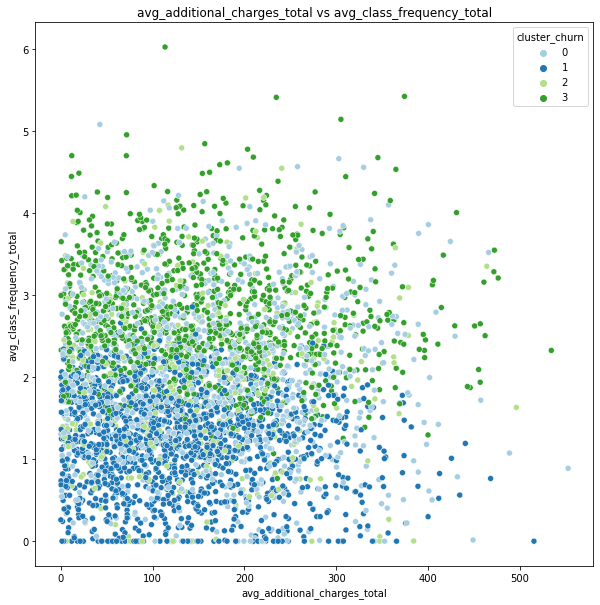

In [185]:
show_clusters_on_plot(df, "avg_additional_charges_total",
                     "avg_class_frequency_total",
                     'cluster_churn')

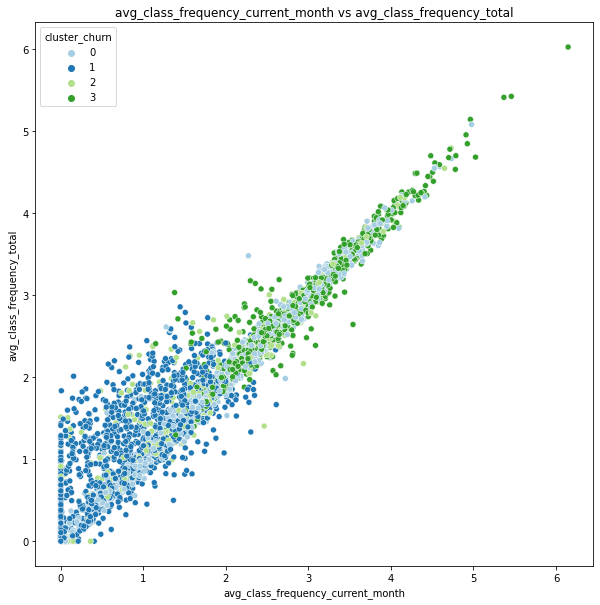

In [186]:
show_clusters_on_plot(df, "avg_class_frequency_current_month",
                     "avg_class_frequency_total",
                     'cluster_churn')

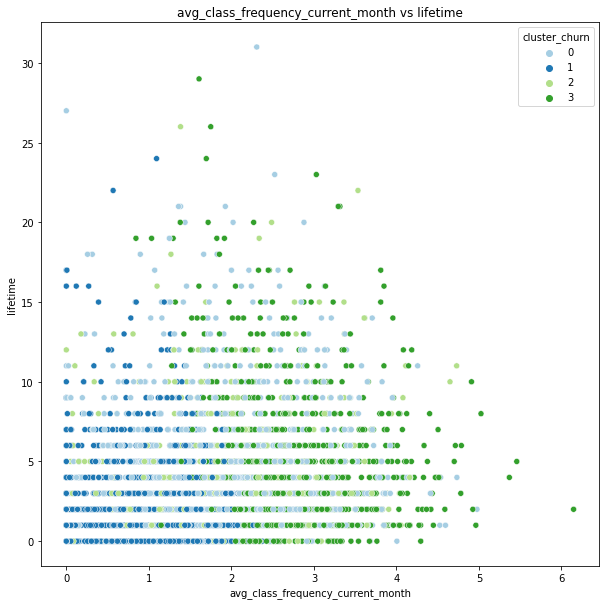

In [187]:
show_clusters_on_plot(df, "avg_class_frequency_current_month",
                     "lifetime",
                     'cluster_churn')

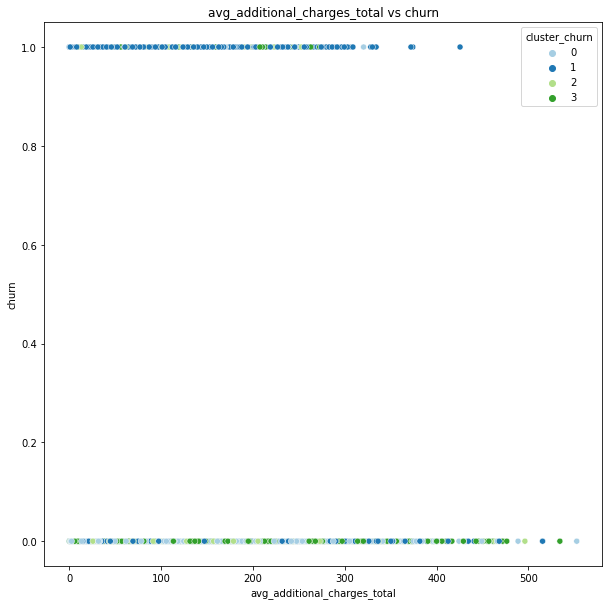

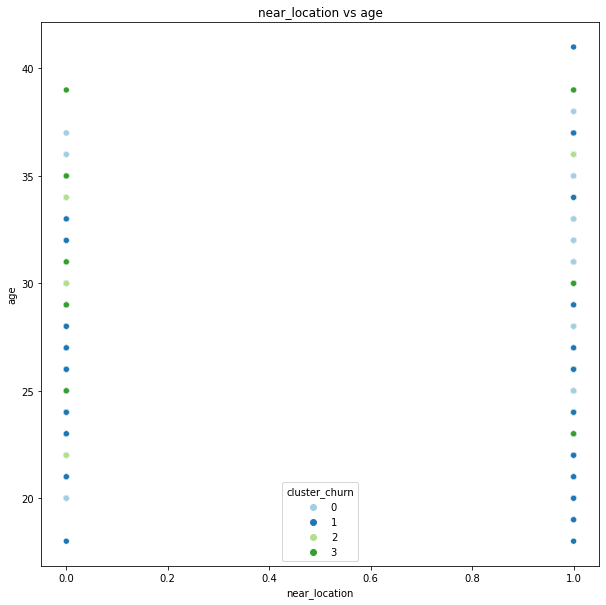

In [188]:
show_clusters_on_plot(df, "avg_additional_charges_total",
                     "churn",
                     'cluster_churn')


show_clusters_on_plot(df, "near_location",
                     "age",
                     'cluster_churn') 

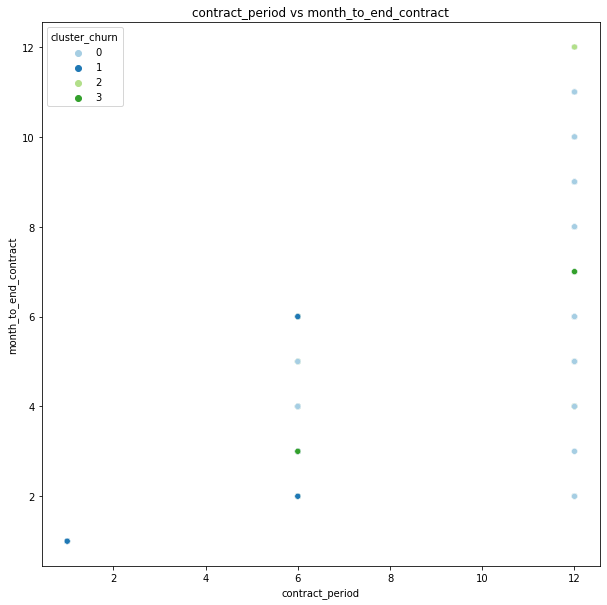

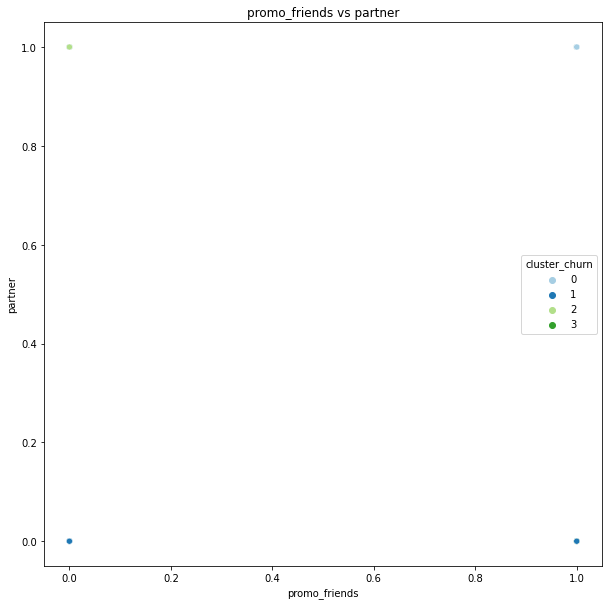

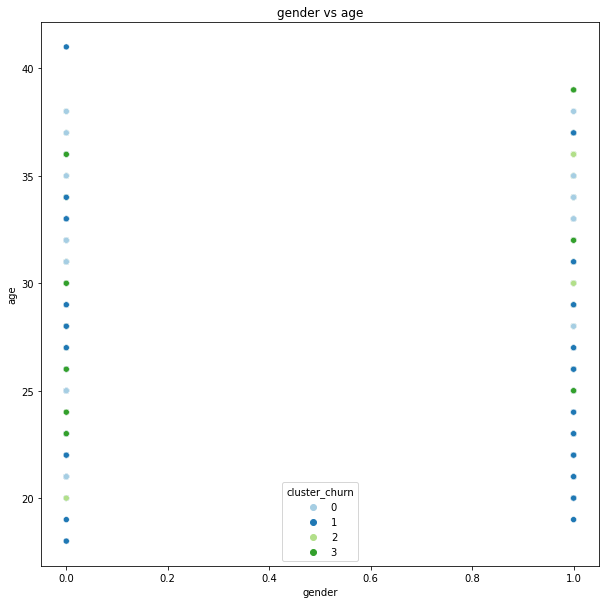

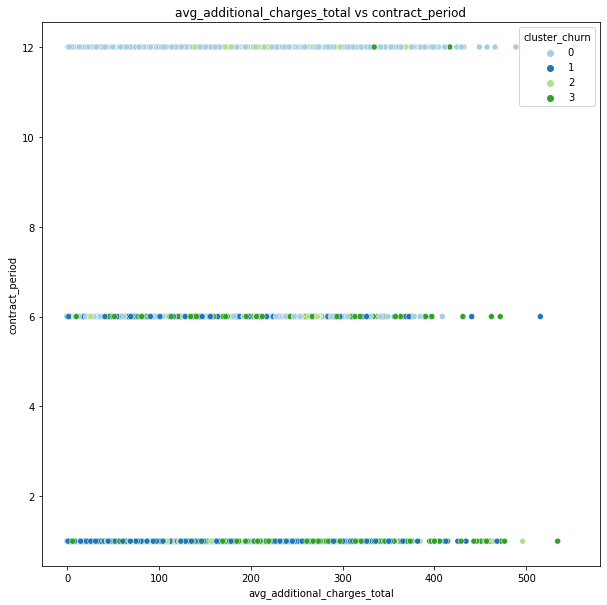

In [189]:
show_clusters_on_plot(df, "contract_period",
                     "month_to_end_contract",
                     'cluster_churn')

show_clusters_on_plot(df, "promo_friends",
                     "partner",
                     'cluster_churn')

show_clusters_on_plot(df, "gender",
                     "age",
                     'cluster_churn')

show_clusters_on_plot(df, "avg_additional_charges_total",
                     "contract_period",
                     'cluster_churn')

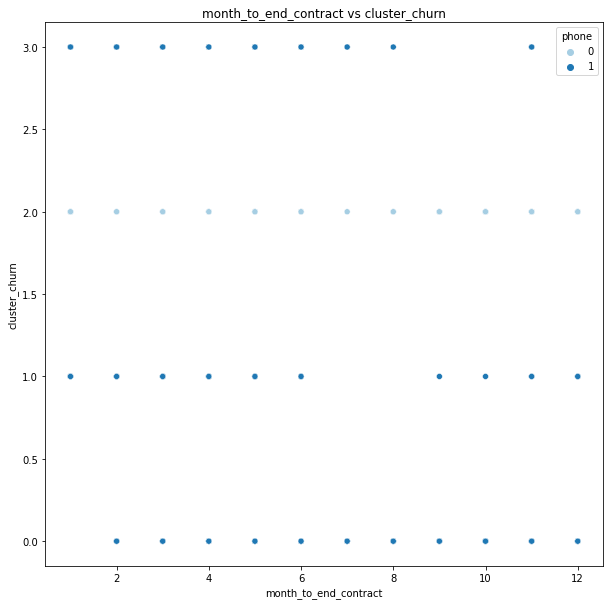

In [190]:
show_clusters_on_plot(df, "month_to_end_contract",
                     "cluster_churn",
                     'phone')

In [191]:
df.head(20)

gender  near_location  partner  promo_friends  phone  contract_period  \
0        1              1        1              1      0                6   
1        0              1        0              0      1               12   
2        0              1        1              0      1                1   
3        0              1        1              1      1               12   
4        1              1        1              1      1                1   
5        1              1        0              0      1                1   
6        1              1        1              1      0                6   
7        0              1        0              0      1                1   
8        1              1        1              1      1                1   
9        0              1        0              0      1                1   
10       0              1        0              0      0                6   
11       1              1        1              0      1                1   
12       0              1        1              1      1                1   
13       1              1        0              0      1                1   
14       0              1        0              0      1                6   
15       0              1        1              1      1               12   
16       0              1        1              1      1                1   
17       0              1        0              1      1                6   
18       0              1        0              0      1                1   
19       1              1        1              1      1               12   

    group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0              1   29                     14.227470                    5.0   
1              1   31                    113.202938                   12.0   
2              0   28                    129.448479                    1.0   
3              1   33                     62.669863                   12.0   
4              0   26                    198.362265                    1.0   
5              1   34                    450.743960                    1.0   
6              1   32                     94.266389                    6.0   
7              0   30                    217.786641                    1.0   
8              1   23                     45.409909                    1.0   
9              0   31                     65.310836                    1.0   
10             1   32                    229.708945                    6.0   
11             0   27                    266.783824                    1.0   
12             1   33                    148.418053                    1.0   
13             1   27                    152.748668                    1.0   
14             0   35                    209.888133                    3.0   
15             0   29                    101.372604                   10.0   
16             1   31                     11.975295                    1.0   
17             1   29                     92.787414                    5.0   
18             1   30                     97.804315                    1.0   
19             1   29                     73.917546                   11.0   

    lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0          3                   0.020398                           0.000000   
1          7                   1.922936                           1.910244   
2          2                   1.859098                           1.736502   
3          2                   3.205633                           3.357215   
4          3                   1.113884                           1.120078   
5          3                   2.623477                           2.637007   
6          2                   1.138941                           1.277242   
7          0                   1.213502                           1.049387   
8          1                   1.106239      

#### Calculate the churn rate for each cluster ####

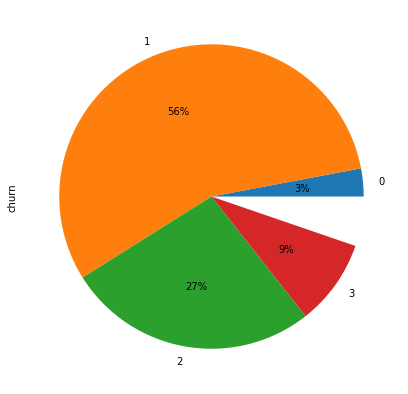

In [195]:
clusters_grouped.churn.plot(kind='pie', subplots=True, figsize=(7,7), autopct='%.0f%%')
plt.show()

## Conclusion ##


***The foregoing analysis tends to show the frequency of gym visits is likely dispositive in predicting churn. Cluster 1 (cluster_churn 0), with 1483 clients,  has the lowest  churn rate of 32 clients, which is about 3%. This group is typified by the most 12-month memberships amongst the clusters.Cluster 1 clients tended to live in the gym's neighborhood. 54% of clients in this group attended group sessions, which is the highest rate amongst the five (5) clusters.  This cluster is evidenced by the youngest average age of about 28, and youngest and oldest outliers, and signed up through the "bring a friend" offer with the highest rate of 61% / 58% for churn / active  clients; whose  average frequency of visits per week over the preceding month was about 2 visits, and, the second highest average frequency of visits per week over the customer's lifetime of about 2. Furthermore, clients in Cluster no. 3 tended to incur the least amount of average additional charges of about 162 USD and 125 USD, active and churn clients, respectively.***

***Cluster 2 (cluster_churn 1), with 1078 clients,  has the highest  churn rate of 653 clients, which is about 56%.  Cluster 2 clients also tended to live in the gym's neighborhood. This cluster is evidenced by the an average age of about 30; and, this group tended  to sign up through the "bring a friend" offer, which may correlate with a high rate of group visits; and, whose  average frequency of visits per week over the preceding month was about 1 visit, and, whose average frequency of visits per week over the customer's lifetime was about 1. Furthermore, clients in Cluster no. 5 tended to incur the lowest amount of average additional charges of about 130.00 USD. Cluster 2 clients also had the average lowest remaining contract duration, which likely contributes to the higher churn rate in this cluster.***

***In total, the highest churn rate is among clients with the 1-month memberships - 934, followed by 6-month memberships - 104, and 12-month memberships - 23. A reasonable inference would be that the amount of money spent on a membership,  is likely positively correlated with  lower churn because conceivably longer membership periods are more expensive; however, a review of repeat renewals  in longer dated memberships is warranted to confirm whether churn is in fact lower and not just delayed due to longer membership periods.***

***Moreover, higher additional charges tended  to be positively correlated with the likelihood of remaining an active gym member. In addition, without exception, churn clients spent less on additional charges than non-churn clients.***

***Still, the principal feature that predicts churn is  average frequency of visits per week over the preceding month. The 56% churn rate for Cluster 2, whose feature "avg_class_frequency_current_month," the average frequency of visits per week over the preceding month, was prioritized by the 'feature importance" function, tends to show  that there is an inverse correlation between average class attendance and the likelihood of churn, the target value. The  function correlates with the highest churn group, which is Cluster 2 ("cluster_churn 1"). That is, Cluster 2 with a churn of about 56% is the highest churn group, and in accordance with the feature importance of 'avg_class_frequency_total,' here, about 1.21, is the lowest rate among the clusters. Accordingly, the cluster with the two lowest churn rates roughly reflects this correlation whereby Cluster 1 (cluster_churn 0) 3% and Cluster 3 (cluster_churn 4) 9%, whose "avg_class_frequency_total" is about 2 and 2.70,the clusters with the two highest attendance frequencies,  respectively.***

***Consequently, an effective marketing strategy might incorporate concessions and perks for members whose recommendations recruit new members, and who remain for several contractual periods. The spectrum of services offered may be expanded to warrant more premium membership types. Another strategy that may increase retention is offering discounts to corporate partners in combination with longstanding memberships. Finally, a rewards program that incentivizes consistent attendance of group sessions may also increase retention. The correlation between 'near_location' and 'promo_friends' / 'group_visits' / 'Month_to_end_contract', 20%, 15%, 12%, respectively may indicate that proximity to the gym coupled with the social factors of engaging in exercise in groups and joining the gym through a friend or acquaintance may have an impact on new client acquisition and retention and should be incorporated in an optimal marketing strategy.***


